In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [4]:
titanic=pd.read_csv(Url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.isnull().sum().sort_values(ascending=False)
percent=titanic.isnull().sum()/titanic.isnull().count()*100
percent.sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

['male' 'female']


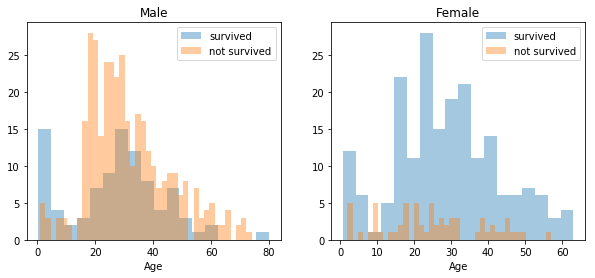

In [8]:
print(titanic['Sex'].unique())
##Finding the unique values for categorical column

x=titanic[['Age','Sex','Survived']]
#y=titanic['Survived']

x_men=x[x['Sex']=='male']
x_women=x[x['Sex']=='female']
fig,axes=plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
plotnumber=1
ax=sns.distplot(x_men[x_men['Survived']==1].Age.dropna(), bins=18,label='survived',ax=axes[0],kde=False)
ax=sns.distplot(x_men[x_men['Survived']==0].Age.dropna(), bins=40,label='not survived',ax=axes[0],kde=False)

ax.legend()
ax.set_title('Male')

ax=sns.distplot(x_women[x_women['Survived']==1].Age.dropna(), bins=18,label='survived',ax=axes[1],kde=False)
ax=sns.distplot(x_women[x_women['Survived']==0].Age.dropna(), bins=40,label='not survived',ax=axes[1],kde=False)

ax.legend()
ax.set_title('Female')
plt.show()

In [9]:
##survival rate of mens is higher between 20-40 but same is not true for women as the survival rate of varies 
#around different ages

In [10]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

/home/manish/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/manish/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/manish/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


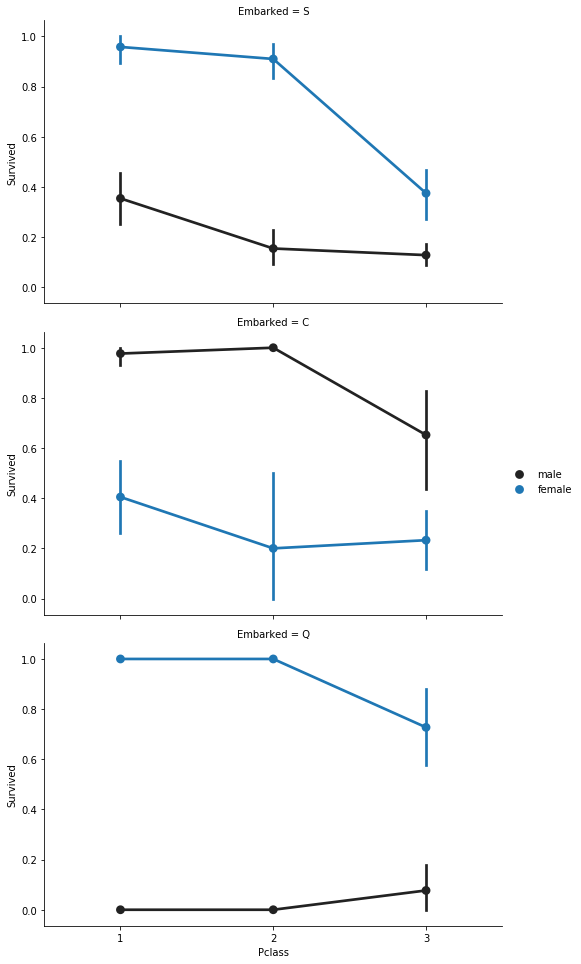

In [17]:
FacetGrid = sns.FacetGrid(titanic, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
FacetGrid.add_legend()

#sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="point", data=titanic);

In [25]:
#Embarked seems to have a correlation with survival, depending on the gender.
#Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. 
#Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

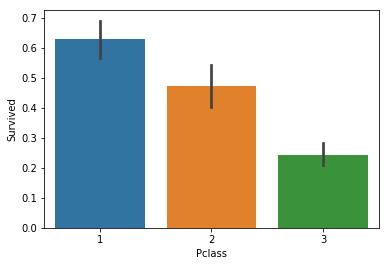

In [26]:
#For Pclass

sns.barplot(x='Pclass',y='Survived',data=titanic)

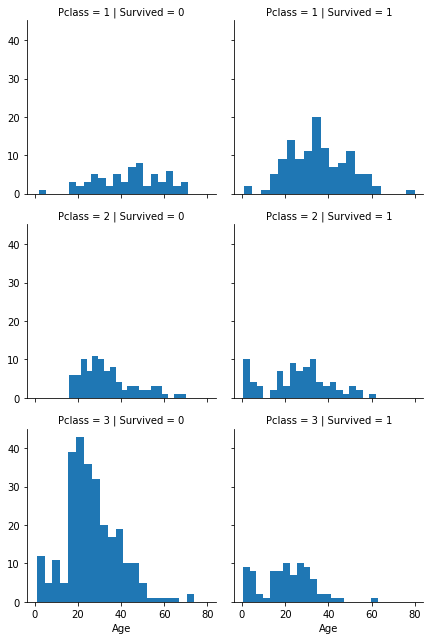

In [30]:
#For Pclass=1 the survival rate is higher than other classes and the below historgram proves that the suvival
#rate is more for PClass=1

grid=sns.FacetGrid(titanic,col='Survived',row='Pclass')
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

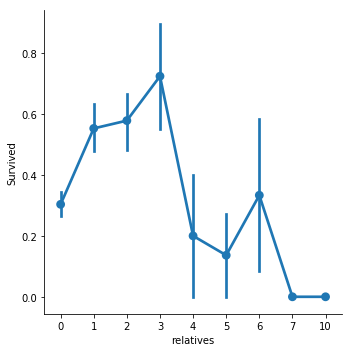

In [61]:
dataset=titanic.copy()
dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
#dataset.head()
dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
dataset['not_alone'] = dataset['not_alone'].astype(int)
sns.catplot('relatives','Survived', data=dataset,kind='point')

In [62]:
#Here we can see that you had a high probabilty of survival with 1 to 3 realitves, 
#but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

In [269]:
#DataPreprocessing
dataset=titanic.copy()
train_x=dataset.drop(columns=['PassengerId'],axis=1)

In [270]:
train_x['Cabin'].dropna().count()

204

In [271]:
#converting Cabin data into numeric data
import re

deck={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}
train_x['Cabin']=train_x['Cabin'].fillna('U0')
train_x['Deck']=train_x['Cabin'].map(lambda x: re.match("([a-zA-Z]+)",x).group())
train_x['Deck']=train_x['Deck'].map(deck)
#train_x[train_x['Deck'].isnull()==True]
train_x['Deck']=train_x['Deck'].fillna(0)
train_x['Deck']=train_x['Deck'].astype(int)
#train_x
train_x=train_x.drop(columns=['Cabin'],axis=1)

In [272]:
#Age- handling missing values

mean=train_x["Age"].mean()
std=train_x["Age"].std()
isnull=train_x["Age"].isnull().sum()
#print(mean,std,isnull)
random_age=np.random.randint(mean-std,mean+std,size=isnull)
#random_age

age_null=train_x["Age"].copy()
age_null[np.isnan(age_null)]=random_age
#print(pd.concat([age_null,train_x["Age"]],axis=1).head(10))
train_x['Age']=age_null
train_x['Age']=train_x['Age'].astype(int)

In [273]:
##Embarked column
print(train_x['Embarked'].describe())

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


In [274]:
train_x['Embarked']=train_x['Embarked'].fillna('S')

In [275]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
Deck        891 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 76.6+ KB


In [276]:
train_x['Fare']=train_x['Fare'].astype(int)

In [277]:
train_x['Name'].map(lambda x: re.search("Master",x))
train_x['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.')
titles=train_x['Title'].unique()

train_x['Title'].value_counts()


titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_x['Title'] = train_x['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', \
                                             'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_x['Title']=train_x['Title'].replace('Mlle','Miss')
train_x['Title']=train_x['Title'].replace('Mme','Mrs')
train_x['Title']=train_x['Title'].replace('Ms','Miss')

train_x['Title']=train_x['Title'].map(titles)

In [278]:
##Sex

genders={'male':0,'female':1}

train_x['Sex']=train_x['Sex'].map(genders)

In [279]:
#Embarked

ports = {"S": 0, "C": 1, "Q": 2}

train_x['Embarked']=train_x['Embarked'].map(ports)

In [280]:
#dropping columns Name and Ticket
train_x=train_x.drop(columns=['Name','Ticket'])

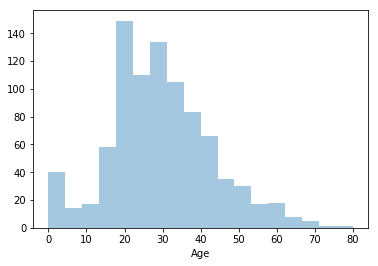

In [281]:
#Creating Categories

sns.distplot(train_x['Age'],bins=18,kde=False)

In [282]:
train_x.loc[train_x['Age']<=11,'Age']=0
train_x.loc[(train_x['Age']>11) & (train_x['Age']<=18),'Age']=1
train_x.loc[(train_x['Age']>18) & (train_x['Age']<=22),'Age']=2
train_x.loc[(train_x['Age']>22) & (train_x['Age']<= 27), 'Age'] = 3
train_x.loc[(train_x['Age']>27) & (train_x['Age']<= 33), 'Age'] = 4
train_x.loc[(train_x['Age']>33) & (train_x['Age']<= 40), 'Age'] = 5
train_x.loc[(train_x['Age']>40) & (train_x['Age']<= 66), 'Age'] = 6
train_x.loc[ train_x['Age']>66, 'Age'] = 6

In [284]:
#train_x['Age'].value_counts()

4    163
6    159
5    158
3    133
2    114
1     96
0     68
Name: Age, dtype: int64

In [288]:
train_x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,2,1,0,7,0,8,1
1,1,1,1,5,1,0,71,1,3,3
2,1,3,1,3,0,0,7,0,8,2
3,1,1,1,5,1,0,53,0,3,3
4,0,3,0,5,0,0,8,0,8,1


In [289]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score

In [294]:
X=train_x.drop(columns=['Survived'])
y=train_x['Survived']

In [299]:
scaler=StandardScaler()
X_transform=scaler.fit_transform(X)

/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [300]:
x_train,x_test,y_train,y_test=train_test_split(X_transform,y,test_size=0.20,random_state=42)

In [301]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [304]:
print(clf.score(x_train,y_train))
clf.score(x_test,y_test)

0.9452247191011236


0.8212290502793296

In [306]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=X_transform

vif=pd.DataFrame()

vif['VIF']= [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif['Features']=X.columns
vif

,VIF,Features
0,2.764244,Pclass
1,1.397394,Sex
2,1.156618,Age
3,1.330563,SibSp
4,1.372806,Parch
5,1.701134,Fare
6,1.061165,Embarked
7,2.369272,Deck
8,1.521247,Title


In [311]:
param_grid = { "criterion" : ["gini", "entropy"],
              "max_depth":range(2,30,1),
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "splitter":["best","random"]}

grid_search=GridSearchCV(estimator=clf,param_grid=param_grid,cv=5,n_jobs=-1)

In [312]:
grid_search.fit(x_train,y_train)

/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 30), 'min_samples_leaf': [1, 5, 10, 25, 50, 70], 'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35], 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [313]:
best_param=grid_search.best_params_
print(best_param)

{'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'random'}


In [317]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=21,min_samples_leaf=5,min_samples_split=10,splitter='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=21,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [318]:
clf.score(x_test,y_test)

0.8212290502793296

In [324]:
y_score=clf.predict_proba(x_test)
roc_auc_score(y_test,y_score[:,1])

0.8584942084942084